In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
# Taken from sklearn docs 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
trainSet = pd.read_csv('dota2Train.csv')
testSet = pd.read_csv('dota2Test.csv')

x = trainSet.drop('-1', 1)
y = trainSet['-1']
testX = testSet.drop('-1', 1)
testY = testSet['-1']

trainSet.head()

# pd.get_dummies(trainSet)

,-1,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


In [4]:
print y.value_counts()

 1    48782
-1    43867
Name: -1, dtype: int64


In [ ]:
def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1

In [5]:
dt = DecisionTreeClassifier()

# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# plot_learning_curve(dt, "Decision Tree", x, y, ylim=(0.0, 1.01), cv=cv, n_jobs=4)

In [9]:
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
dtPred = dt.predict(testX)
print metrics.classification_report(testY, dtPred)

             precision    recall  f1-score   support

         -1       0.49      0.50      0.50      4791
          1       0.55      0.54      0.55      5502

avg / total       0.52      0.52      0.52     10293



<module 'matplotlib.pyplot' from '/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


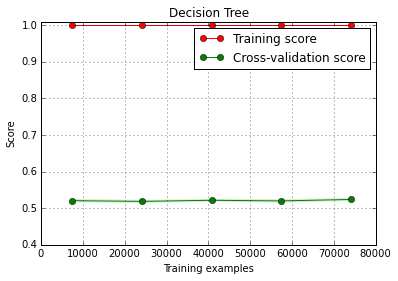

In [13]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
plot_learning_curve(dt, "Decision Tree", x, y, (0.4, 1.01), cv=cv, n_jobs=4)

In [123]:
mlp = MLPClassifier()
mlp.fit(x, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

<module 'matplotlib.pyplot' from '/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

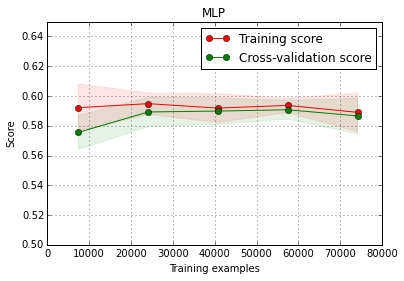

In [16]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
mlp = MLPClassifier()
plot_learning_curve(mlp, "MLP", x, y, (0.5, 0.65), cv=cv, n_jobs=4)

In [4]:
# Code here is the algorithm tuning zone

mlp = MLPClassifier(max_iter = 3800, activation='logistic', learning_rate='adaptive', hidden_layer_sizes=(200,))
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 'learning_rate' :('constant', 'invscaling', 'adaptive')}
# parameters = {'max_iter': (np.arange(1000, 11000, 1000))}
# parameters = {'hidden_layer_sizes' : ((100,), (200,), (300,), (400,), (500,), (600,),(700,),(800,),(900,))}
mlpGS = GridSearchCV(mlp, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=4)
mlpGS.fit(x, y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] hidden_layer_sizes=(100,) .......................................
[CV] hidden_layer_sizes=(100,) .......................................
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .. hidden_layer_sizes=(100,), score=0.598057204533, total=  13.5s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .. hidden_layer_sizes=(100,), score=0.602104695089, total=  23.3s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .. hidden_layer_sizes=(100,), score=0.603885590934, total=  28.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .. hidden_layer_sizes=(100,), score=0.596330275229, total=  28.6s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .. hidden_layer_sizes=(100,), score=0.605504587156, total=  19.2s


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   36.9s


[CV] hidden_layer_sizes=(100,) .......................................
[CV] .. hidden_layer_sizes=(100,), score=0.586616297895, total=  18.5s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .. hidden_layer_sizes=(100,), score=0.583864004317, total=  12.4s
[CV] .. hidden_layer_sizes=(100,), score=0.600971397733, total=  16.2s
[CV] hidden_layer_sizes=(200,) .......................................
[CV] hidden_layer_sizes=(200,) .......................................
[CV] ... hidden_layer_sizes=(100,), score=0.59276848354, total=  15.0s
[CV] hidden_layer_sizes=(200,) .......................................
[CV] .. hidden_layer_sizes=(100,), score=0.595790609822, total=  20.0s
[CV] hidden_layer_sizes=(200,) .......................................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min


[CV] .. hidden_layer_sizes=(200,), score=0.603939557474, total=  21.9s
[CV] hidden_layer_sizes=(200,) .......................................
[CV] .. hidden_layer_sizes=(200,), score=0.603291958985, total=  14.7s
[CV] hidden_layer_sizes=(200,) .......................................
[CV] .. hidden_layer_sizes=(200,), score=0.601726929304, total=  40.7s
[CV] hidden_layer_sizes=(200,) .......................................
[CV] .. hidden_layer_sizes=(200,), score=0.593739881274, total=  51.9s
[CV] hidden_layer_sizes=(200,) .......................................
[CV] .. hidden_layer_sizes=(200,), score=0.590987587696, total=  24.8s
[CV] hidden_layer_sizes=(200,) .......................................
[CV] .. hidden_layer_sizes=(200,), score=0.600215866163, total=  21.0s
[CV] hidden_layer_sizes=(200,) .......................................
[CV] .. hidden_layer_sizes=(200,), score=0.600377765785, total=  52.4s
[CV] hidden_layer_sizes=(300,) .......................................


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.0min


[CV] .. hidden_layer_sizes=(200,), score=0.589314624933, total=  20.6s
[CV] hidden_layer_sizes=(300,) .......................................
[CV] .. hidden_layer_sizes=(200,), score=0.601133297356, total=  18.2s
[CV] hidden_layer_sizes=(300,) .......................................
[CV] .. hidden_layer_sizes=(200,), score=0.597625472207, total=  42.3s
[CV] hidden_layer_sizes=(300,) .......................................
[CV] .. hidden_layer_sizes=(300,), score=0.596600107933, total=  30.2s
[CV] hidden_layer_sizes=(300,) .......................................
[CV] .. hidden_layer_sizes=(300,), score=0.599082568807, total=  45.2s
[CV] hidden_layer_sizes=(300,) .......................................
[CV] .. hidden_layer_sizes=(300,), score=0.588235294118, total=  48.8s
[CV] hidden_layer_sizes=(300,) .......................................
[CV] .. hidden_layer_sizes=(300,), score=0.599622234215, total=  41.5s
[CV] hidden_layer_sizes=(300,) .......................................


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.4min


[CV] .. hidden_layer_sizes=(300,), score=0.592606583918, total=  29.9s
[CV] hidden_layer_sizes=(300,) .......................................
[CV] .. hidden_layer_sizes=(300,), score=0.604047490556, total=  34.0s
[CV] .. hidden_layer_sizes=(300,), score=0.598488936859, total=  30.0s
[CV] hidden_layer_sizes=(300,) .......................................
[CV] hidden_layer_sizes=(400,) .......................................
[CV] .. hidden_layer_sizes=(300,), score=0.598434970318, total=  27.8s
[CV] hidden_layer_sizes=(400,) .......................................
[CV] .. hidden_layer_sizes=(300,), score=0.595304910955, total=  30.3s
[CV] hidden_layer_sizes=(400,) .......................................
[CV] .. hidden_layer_sizes=(300,), score=0.598974635726, total=  31.2s
[CV] hidden_layer_sizes=(400,) .......................................
[CV] .. hidden_layer_sizes=(400,), score=0.597247706422, total=  34.8s
[CV] hidden_layer_sizes=(400,) .......................................
[CV] .

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.8min


[CV] .. hidden_layer_sizes=(400,), score=0.589422558014, total=  55.5s
[CV] hidden_layer_sizes=(400,) .......................................
[CV] .. hidden_layer_sizes=(400,), score=0.606260118726, total=  59.3s
[CV] hidden_layer_sizes=(400,) .......................................
[CV] .. hidden_layer_sizes=(400,), score=0.601834862385, total=  33.0s
[CV] hidden_layer_sizes=(400,) .......................................
[CV] .. hidden_layer_sizes=(400,), score=0.592174851592, total=  54.1s
[CV] hidden_layer_sizes=(500,) .......................................
[CV] .... hidden_layer_sizes=(400,), score=0.5970858068, total=  33.6s
[CV] hidden_layer_sizes=(500,) .......................................
[CV] .. hidden_layer_sizes=(400,), score=0.590879654614, total= 1.1min
[CV] hidden_layer_sizes=(500,) .......................................
[CV] .. hidden_layer_sizes=(500,), score=0.591527253103, total=  45.4s
[CV] hidden_layer_sizes=(500,) .......................................
[CV] .

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.7min


[CV] .. hidden_layer_sizes=(500,), score=0.590501888829, total=  56.7s
[CV] hidden_layer_sizes=(500,) .......................................
[CV] .. hidden_layer_sizes=(500,), score=0.585914732866, total=  37.2s
[CV] hidden_layer_sizes=(500,) .......................................
[CV] .. hidden_layer_sizes=(500,), score=0.598704803022, total=  51.6s
[CV] hidden_layer_sizes=(500,) .......................................
[CV] .. hidden_layer_sizes=(500,), score=0.579492714517, total= 1.4min
[CV] hidden_layer_sizes=(500,) .......................................
[CV] .. hidden_layer_sizes=(500,), score=0.598434970318, total=  32.4s
[CV] hidden_layer_sizes=(600,) .......................................
[CV] .. hidden_layer_sizes=(500,), score=0.596114409066, total=  49.5s
[CV] hidden_layer_sizes=(600,) .......................................
[CV] ... hidden_layer_sizes=(500,), score=0.59347004857, total= 1.0min
[CV] hidden_layer_sizes=(600,) .......................................
[CV] .

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  9.7min


[CV] .. hidden_layer_sizes=(500,), score=0.600863464652, total= 2.8min
[CV] hidden_layer_sizes=(600,) .......................................
[CV] .. hidden_layer_sizes=(600,), score=0.606368051808, total= 1.6min
[CV] hidden_layer_sizes=(600,) .......................................
[CV] ... hidden_layer_sizes=(600,), score=0.59131138694, total=  55.4s
[CV] hidden_layer_sizes=(600,) .......................................
[CV] .. hidden_layer_sizes=(600,), score=0.576956287102, total= 1.5min
[CV] hidden_layer_sizes=(700,) .......................................
[CV] .. hidden_layer_sizes=(600,), score=0.589206691851, total=  43.4s
[CV] hidden_layer_sizes=(700,) .......................................
[CV] .. hidden_layer_sizes=(600,), score=0.600269832704, total= 1.1min
[CV] hidden_layer_sizes=(700,) .......................................
[CV] .. hidden_layer_sizes=(600,), score=0.592120885051, total= 1.2min
[CV] hidden_layer_sizes=(700,) .......................................
[CV] .

[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 13.4min


[CV] .. hidden_layer_sizes=(700,), score=0.601726929304, total= 1.9min
[CV] hidden_layer_sizes=(700,) .......................................
[CV] .. hidden_layer_sizes=(700,), score=0.597301672963, total= 1.0min
[CV] hidden_layer_sizes=(700,) .......................................
[CV] .. hidden_layer_sizes=(700,), score=0.591851052348, total= 1.5min
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .. hidden_layer_sizes=(700,), score=0.578467350243, total=  55.9s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .. hidden_layer_sizes=(700,), score=0.596977873718, total= 2.0min
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .. hidden_layer_sizes=(700,), score=0.569185105235, total=  59.0s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .. hidden_layer_sizes=(800,), score=0.596492174852, total=  57.7s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .

[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 18.5min


[CV] .. hidden_layer_sizes=(800,), score=0.574150026983, total= 1.1min
[CV] hidden_layer_sizes=(900,) .......................................
[CV] .. hidden_layer_sizes=(800,), score=0.591905018888, total= 1.6min
[CV] hidden_layer_sizes=(900,) .......................................
[CV] .. hidden_layer_sizes=(800,), score=0.601295196978, total= 2.2min
[CV] hidden_layer_sizes=(900,) .......................................
[CV] .. hidden_layer_sizes=(900,), score=0.583864004317, total= 1.2min
[CV] hidden_layer_sizes=(900,) .......................................
[CV] .. hidden_layer_sizes=(900,), score=0.576038855909, total= 1.4min
[CV] hidden_layer_sizes=(900,) .......................................
[CV] .. hidden_layer_sizes=(900,), score=0.598327037237, total= 1.1min
[CV] hidden_layer_sizes=(900,) .......................................
[CV] .. hidden_layer_sizes=(900,), score=0.597355639504, total= 2.1min
[CV] hidden_layer_sizes=(900,) .......................................
[CV] .

[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 23.8min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=3800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'hidden_layer_sizes': ((100,), (200,), (300,), (400,), (500,), (600,), (700,), (800,), (900,))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [6]:
print(mlpGS.best_score_)
print(mlpGS.best_estimator_.hidden_layer_sizes)

0.598235294118
(200,)


In [10]:
mlp = MLPClassifier(max_iter = 3800, activation='logistic', learning_rate='adaptive', hidden_layer_sizes=(200,))
mlp.fit(x, y)
mlpPred = mlp.predict(testX)
print metrics.classification_report(testY, mlpPred)

             precision    recall  f1-score   support

         -1       0.59      0.41      0.49      4791
          1       0.60      0.76      0.67      5502

avg / total       0.60      0.60      0.58     10293



In [124]:
mlpPred = mlp.predict(testX)
print metrics.classification_report(testY, mlpPred)

             precision    recall  f1-score   support

         -1       0.59      0.41      0.49      4791
          1       0.60      0.76      0.67      5502

avg / total       0.60      0.60      0.58     10293



In [120]:
ada = AdaBoostClassifier()
ada.fit(x, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [122]:
adaPred = ada.predict(testX)
print metrics.classification_report(testY, adaPred)

             precision    recall  f1-score   support

         -1       0.56      0.49      0.52      4791
          1       0.60      0.67      0.63      5502

avg / total       0.58      0.59      0.58     10293



In [ ]:
# Code here is the algorithm tuning zone will be commented out takes a long time to run

svc = SVC()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
parameters = {'kernel': ('linear', 'rbf', 'poly')} 
svcGS= GridSearchCV(svc, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
svcGS.fit(x, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] kernel=linear ...................................................
[CV] kernel=linear ...................................................
[CV] kernel=linear ...................................................
[CV] kernel=linear ...................................................
[CV] kernel=linear ...................................................
[CV] kernel=rbf ......................................................
[CV] kernel=rbf ......................................................
[CV] kernel=rbf ......................................................
[CV] ................ kernel=rbf, score=0.598111171074, total=107.1min
[CV] kernel=rbf ......................................................
[CV] ................ kernel=rbf, score=0.595304910955, total=107.2min
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 163.7min remaining: 1064.0min


[CV] ................ kernel=rbf, score=0.599676200756, total=109.8min
[CV] kernel=poly .....................................................
[CV] ................ kernel=rbf, score=0.594495412844, total=103.8min
[CV] kernel=poly .....................................................


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 320.3min remaining: 880.8min


[CV] ................ kernel=rbf, score=0.596114409066, total=106.7min
[CV] kernel=poly .....................................................
[CV] ............. kernel=linear, score=0.602536427415, total=590.1min
[CV] kernel=poly .....................................................


[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 642.4min remaining: 963.6min


[CV] ............. kernel=linear, score=0.597571505666, total=593.4min
[CV] kernel=poly .....................................................
[CV] ............... kernel=linear, score=0.5985429034, total=593.6min


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 646.0min remaining: 565.2min


[CV] ............. kernel=linear, score=0.604047490556, total=596.0min
[CV] ............. kernel=linear, score=0.606637884512, total=597.8min


[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 649.3min remaining: 324.7min


[CV] ............... kernel=poly, score=0.589314624933, total=892.3min
[CV] ............... kernel=poly, score=0.589260658392, total=813.4min


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 1145.4min remaining: 286.3min


[CV] ............... kernel=poly, score=0.588720992984, total=865.8min
[CV] ............... kernel=poly, score=0.595250944414, total=612.2min
[CV] ............... kernel=poly, score=0.587263896384, total=638.2min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 1285.3min finished


In [ ]:
# Printouts --
print(svcGS.best_score_)
print(svcGS.best_estimator_.kernel)
print svcGS.param_grid['kernel']
print(svcGS.cv_results_['mean_test_score'])
print(svcGS.cv_results_['mean_train_score'])

In [ ]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("SVC  Dota2 Dataset")
plt.xlabel("Power Parameter")
plt.ylabel("Score")

plt.grid()

plt.plot(svcGS.param_grid['p'], svcGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(svcGS.param_grid['p'], svcGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

In [ ]:
svc = SVC()
svc.fit(x,y)

In [ ]:
svcPred = svc.predict(testX)
print metrics.classification_report(testY, svcPred)

In [131]:
knn = KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
# Code here is the algorithm tuning zone will be commented out takes a long time to run

knn = KNeighborsClassifier(leaf_size = 80, n_neighbors=350, p=2)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# parameters = {'n_neighbors': (np.arange(50, 500, 50))} 
# parameters = {'leaf_size': (np.arange(10, 100, 10))}
parameters = {'p' : (np.arange(1, 4))}
knnGS = GridSearchCV(knn, parameters, cv = cv, scoring='accuracy', verbose=10, n_jobs=-1)
knnGS.fit(x, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] p=1 .............................................................
[CV] p=1 .............................................................
[CV] p=1 .............................................................
[CV] p=1 .............................................................
[CV] p=1 .............................................................
[CV] p=2 .............................................................
[CV] p=2 .............................................................
[CV] p=2 .............................................................
[CV] ........................ p=2, score=0.564867781975, total= 4.3min
[CV] p=2 .............................................................
[CV] ........................ p=2, score=0.560442525634, total= 4.2min
[CV] p=2 .............................................................


[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 21.4min remaining: 139.1min


[CV] ........................ p=2, score=0.562385321101, total= 4.3min
[CV] p=3 .............................................................
[CV] ........................ p=1, score=0.557150566649, total= 7.6min
[CV] p=3 .............................................................


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 39.0min remaining: 107.3min


[CV] ........................ p=1, score=0.560280626012, total= 7.6min
[CV] p=3 .............................................................
[CV] ........................ p=1, score=0.563248785753, total= 7.7min
[CV] p=3 .............................................................


[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 39.1min remaining: 58.7min


[CV] ........................ p=1, score=0.562277388019, total= 7.7min
[CV] p=3 .............................................................
[CV] ........................ p=1, score=0.565731246627, total= 7.7min


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 39.4min remaining: 34.4min


[CV] ........................ p=2, score=0.564328116568, total= 4.2min
[CV] ........................ p=2, score=0.562871019968, total= 4.6min


[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 41.5min remaining: 20.8min


[CV] ........................ p=3, score=0.565461413923, total=19.5min
[CV] ........................ p=3, score=0.559093362115, total=14.9min


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 108.5min remaining: 27.1min


[CV] ........................ p=3, score=0.563464651916, total=14.5min
[CV] ........................ p=3, score=0.557420399352, total=14.6min
[CV] ........................ p=3, score=0.557582298975, total=14.4min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 109.9min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=80, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=350, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'p': array([1, 2, 3])}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=10)

/home/kristian/venv/data-science/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


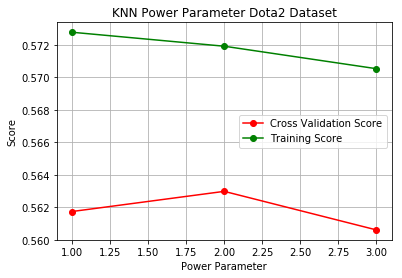

In [5]:
# Graph drawing section, code changed everytime when i need a new graph, will be commented
plt.figure()
plt.title("KNN Power Parameter Dota2 Dataset")
plt.xlabel("Power Parameter")
plt.ylabel("Score")

plt.grid()

plt.plot(knnGS.param_grid['p'], knnGS.cv_results_['mean_test_score'], 'o-', color="r",
         label="Cross Validation Score" )
plt.plot(knnGS.param_grid['p'], knnGS.cv_results_['mean_train_score'], 'o-', color="g",
         label="Training Score")
plt.legend(loc="best")

In [7]:
# Printouts -- TO BE REMOVED
print(knnGS.best_score_)
print(knnGS.best_estimator_.p)
print knnGS.param_grid['p']
print(knnGS.cv_results_['mean_test_score'])
print(knnGS.cv_results_['mean_train_score'])

0.562978953049
2
[1 2 3]
[ 0.56173772  0.56297895  0.56060443]
[ 0.57277891  0.57191813  0.57053387]


In [7]:
nnParam = [50,60,70,80,90,100,110,120,130,140]
nnScore = [ 0.54756611, 0.54765246 ,0.5503184  ,0.55109552,  0.55184026, 0.5529088 ,0.55357798 ,0.5556395, 0.55722612, 0.55671883]
nnTrain = [0, 0, 0, 0, 0, 0.58380172, 0.58243365, 0.58160256, 0.5803775, 0.57954101]
lsParam = [10, 20, 30, 40, 50, 60, 70, 80, 90]
lsScore = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.7]
lsScore = [ 0.52411225 , 0.52422018,  0.52422018 , 0.523864  ,  0.523864, 0.523864, 0.523864,0.52431732,0.52431732]
lsTrain = [ 0.70109419, 0.70096197, 0.70096197, 0.70094578, 0.70094578, 0.70094578, 0.70094578, 0.70111307, 0.70111307]

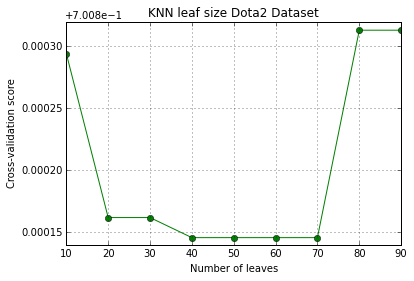

In [8]:
plt.figure()
plt.title("KNN leaf size Dota2 Dataset")
plt.xlabel("Number of leaves")
plt.ylabel("Cross-validation score")

plt.grid()

# plt.plot(lsParam, lsScore, 'o-', color="r")
plt.plot(lsParam, lsTrain, 'o-', color="g")

<module 'matplotlib.pyplot' from '/home/kristian/venv/data-science/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

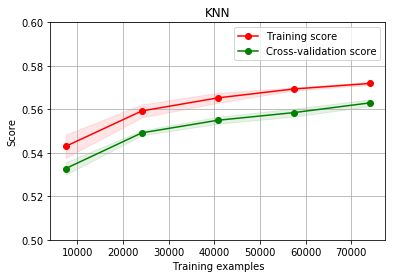

In [12]:
knn = KNeighborsClassifier(leaf_size = 80, n_neighbors=350, p=2)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(knn, "KNN", x, y, (0.5, 0.6), cv=cv, n_jobs=-1)

In [10]:
knn = KNeighborsClassifier()
knn.fit(x, y)
knnPred = knn.predict(testX)
print metrics.classification_report(testY, knnPred)

             precision    recall  f1-score   support

         -1       0.49      0.48      0.49      4791
          1       0.56      0.57      0.56      5502

avg / total       0.53      0.53      0.53     10293

